In this module we will learn about some basic tools of computer vision.

1. Face detection using open CV
2. Face detection using dlib
3. Landmark detection 
4. Concept of Region of Interest
5. Neual network basics
6. Relu

# ***Face detection using opencv***

getting required files

In [ ]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-08-16 04:07:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-08-16 04:07:27 (6.80 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
!wget -O "test.jpg" "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTTz7VxUOg0VUj5cXu_12sbymAWDwKn0d85zQ&usqp=CAU"

--2020-08-16 04:08:57--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTTz7VxUOg0VUj5cXu_12sbymAWDwKn0d85zQ&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.218.102, 173.194.218.138, 173.194.218.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.218.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6349 (6.2K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]   6.20K  --.-KB/s    in 0s      

2020-08-16 04:08:57 (29.6 MB/s) - ‘test.jpg’ saved [6349/6349]



In [ ]:
!wget -O "test2.jpg" "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR6m2HryHMOLxQJngp52UECxeol9kAgxXw3VQ&usqp=CAU"

--2020-08-16 04:24:25--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR6m2HryHMOLxQJngp52UECxeol9kAgxXw3VQ&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.217.113, 173.194.217.102, 173.194.217.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.217.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7834 (7.7K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>]   7.65K  --.-KB/s    in 0s      

2020-08-16 04:24:25 (74.9 MB/s) - ‘test2.jpg’ saved [7834/7834]



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def return_face_with_bounding_box(test):
  img = cv2.imread(test)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  return img

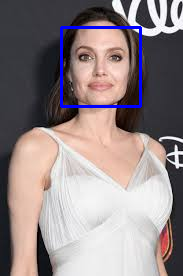

In [ ]:
my_image = return_face_with_bounding_box('test.jpg')
cv2_imshow(my_image)

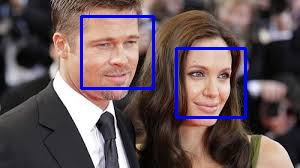

In [ ]:
my_image = return_face_with_bounding_box('test2.jpg')
cv2_imshow(my_image)

# ***Face detection using dlib***

Face finder function.... using dlib just call face_finder function and it will return all the cropped faces found in that image.Beware that it will return array object reather than the normal one so handle iti properly

In [ ]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [ ]:
img = face_finder("test.jpg")

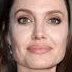

In [ ]:
img[0]

In [ ]:
img2 = face_finder("test2.jpg")

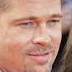

In [ ]:
img2[0]

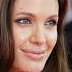

In [ ]:
img2[1]

# ***Landmark feature detection......***

getting and extracting necessary files..........

In [ ]:
!wget "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2020-08-16 04:45:44--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  18.5MB/s    in 3.3s    

2020-08-16 04:45:48 (18.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



getting test image

In [ ]:
!wget -O "test3.jpg" "https://i.pinimg.com/originals/56/4a/6f/564a6f6f881e28f31e9c1dca06891e80.jpg"

--2020-08-16 04:56:41--  https://i.pinimg.com/originals/56/4a/6f/564a6f6f881e28f31e9c1dca06891e80.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.64.84, 2600:1402:2000:390::1931, 2600:1402:2000:396::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|199.232.64.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97571 (95K) [image/jpeg]
Saving to: ‘test3.jpg’

test3.jpg           100%[===================>]  95.28K  --.-KB/s    in 0.04s   

2020-08-16 04:56:42 (2.49 MB/s) - ‘test3.jpg’ saved [97571/97571]



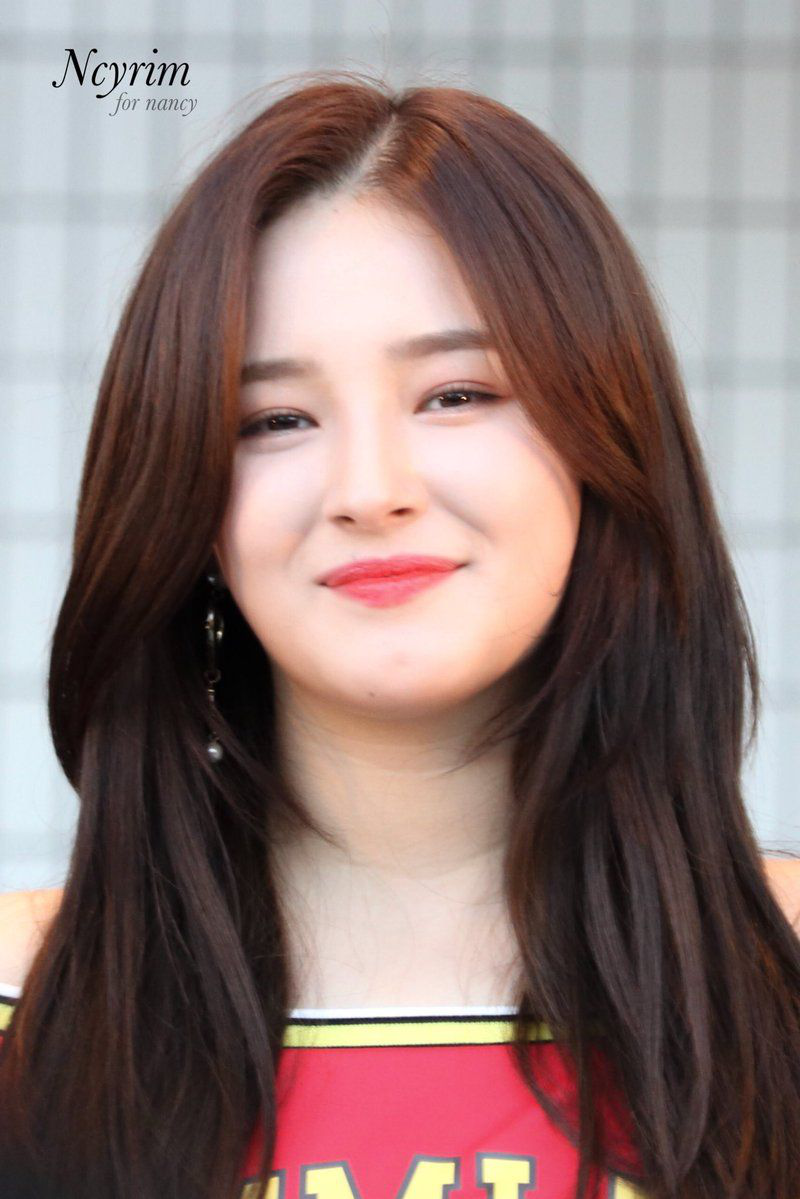

In [ ]:
Image.open("test3.jpg")

In [ ]:
import dlib
import cv2
import os
import numpy as np
import imutils
import matplotlib.pyplot as plt
# Face detector and landmark detector
face_detector = dlib.get_frontal_face_detector()   
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")# Landmark detector path
def shape_to_list(shape):
    coords = []
    for i in range(0, 68):
        coords.append((shape.part(i).x, shape.part(i).y))
    return coords
def my_detector(test):
  img=cv2.imread(test)
  frame = imutils.resize(img, width=400)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  for rect in rects:
    (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
    cv2.rectangle(frame,(bX, bY),(bX + bW, bY + bH),(0, 255, 0),1)
    shape = landmark_detector(gray, rect)
    shape = face_utils.shape_to_np(shape)
    for (i, (x, y)) in enumerate(shape):
      cv2.circle(frame, (x, y), 1, (0, 0, 255), 5)
      #cv2.putText(frame, str(i + 1), (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)
  cv2_imshow(frame)



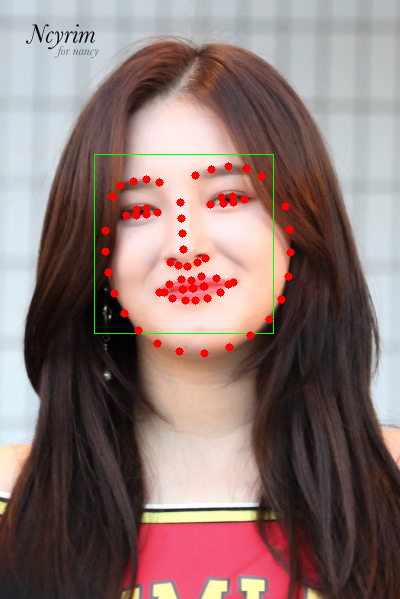

In [ ]:
my_detector("test3.jpg")

In [ ]:
import dlib
import cv2
import os
import numpy as np
import imutils
import matplotlib.pyplot as plt
# Face detector and landmark detector
face_detector = dlib.get_frontal_face_detector()   
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")# Landmark detector path
def shape_to_list(shape):
    coords = []
    for i in range(0, 68):
        coords.append((shape.part(i).x, shape.part(i).y))
    return coords
def my_detector_number_plot(test):
  img=cv2.imread(test)
  frame = imutils.resize(img, width=400)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  for rect in rects:
    (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
    cv2.rectangle(frame,(bX, bY),(bX + bW, bY + bH),(0, 255, 0),1)
    shape = landmark_detector(gray, rect)
    shape = face_utils.shape_to_np(shape)
    for (i, (x, y)) in enumerate(shape):
      cv2.circle(frame, (x, y), 1, (0, 0, 255), 0)
      cv2.putText(frame, str(i + 1), (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.35, (255, 0, 255), 1)
  cv2_imshow(frame)



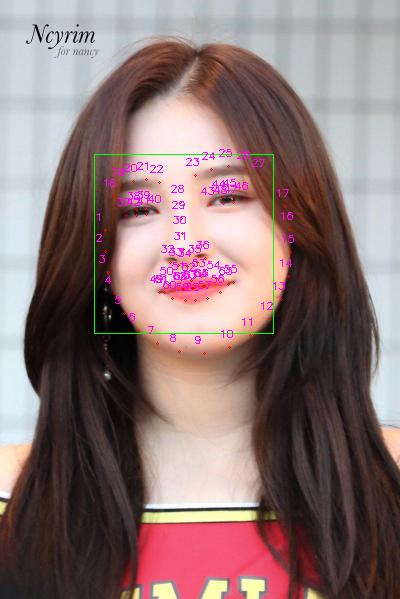

In [ ]:
my_detector_number_plot("test3.jpg")

# ***Concept of Region of Interest***

# ***Basics of Neural networks***

# ***Relu***